In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    #cv2.waitKey(5000)
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [8]:
mp_drawing.draw_landmarks??

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

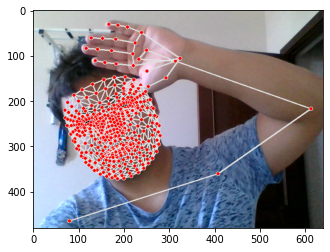

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
results.pose_landmarks

landmark {
  x: 0.24262206256389618
  y: 0.5842114686965942
  z: -1.143892526626587
  visibility: 0.9999000430107117
}
landmark {
  x: 0.25932827591896057
  y: 0.4851192235946655
  z: -1.0980877876281738
  visibility: 0.9997885823249817
}
landmark {
  x: 0.280235230922699
  y: 0.470280259847641
  z: -1.097764492034912
  visibility: 0.999808669090271
}
landmark {
  x: 0.3023349642753601
  y: 0.45490214228630066
  z: -1.097289800643921
  visibility: 0.9997671246528625
}
landmark {
  x: 0.19905579090118408
  y: 0.5278733372688293
  z: -1.0400993824005127
  visibility: 0.999741792678833
}
landmark {
  x: 0.17787252366542816
  y: 0.5416347980499268
  z: -1.0388070344924927
  visibility: 0.9997178912162781
}
landmark {
  x: 0.15922436118125916
  y: 0.5543897151947021
  z: -1.0389654636383057
  visibility: 0.9996762871742249
}
landmark {
  x: 0.36131978034973145
  y: 0.4489981532096863
  z: -0.6665307283401489
  visibility: 0.9999091029167175
}
landmark {
  x: 0.17115876078605652
  y: 0.56064

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
test

array([ 3.45120639e-01,  3.81795430e+00, -2.59985775e-01,  3.17202503e-04])

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
pose

array([ 2.42622063e-01,  5.84211469e-01, -1.14389253e+00,  9.99900043e-01,
        2.59328276e-01,  4.85119224e-01, -1.09808779e+00,  9.99788582e-01,
        2.80235231e-01,  4.70280260e-01, -1.09776449e+00,  9.99808669e-01,
        3.02334964e-01,  4.54902142e-01, -1.09728980e+00,  9.99767125e-01,
        1.99055791e-01,  5.27873337e-01, -1.04009938e+00,  9.99741793e-01,
        1.77872524e-01,  5.41634798e-01, -1.03880703e+00,  9.99717891e-01,
        1.59224361e-01,  5.54389715e-01, -1.03896546e+00,  9.99676287e-01,
        3.61319780e-01,  4.48998153e-01, -6.66530728e-01,  9.99909103e-01,
        1.71158761e-01,  5.60645103e-01, -3.57950389e-01,  9.99825776e-01,
        3.11623633e-01,  6.19997382e-01, -9.78722215e-01,  9.99890089e-01,
        2.40867928e-01,  6.72062337e-01, -8.89382064e-01,  9.99783754e-01,
        6.38621151e-01,  7.51710594e-01, -5.18528044e-01,  9.99464691e-01,
        1.25375003e-01,  9.67128098e-01, -5.46723744e-03,  9.96553242e-01,
        9.59296525e-01,  

In [18]:
len(pose)

132

In [19]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
result_test = extract_keypoints(results)

In [22]:
result_test

array([ 0.24262206,  0.58421147, -1.14389253, ...,  0.        ,
        0.        ,  0.        ])

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.24262206,  0.58421147, -1.14389253, ...,  0.        ,
        0.        ,  0.        ])

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [26]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [28]:
cap.release()
cv2.destroyAllWindows()

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(90, 30, 1662)

In [34]:
np.array(labels).shape

(90,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(90, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(5, 3)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
res = [.7, 0.2, 0.1]

In [44]:
actions[np.argmax(res)]

'hello'

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 8s 617ms/step - loss: 1.5839 - categorical_accuracy: 0.2824
Epoch 2/1000
3/3 [==============================] - 2s 712ms/step - loss: 7.3768 - categorical_accuracy: 0.2235
Epoch 3/1000
3/3 [==============================] - 2s 664ms/step - loss: 12.6108 - categorical_accuracy: 0.3647
Epoch 4/1000
3/3 [==============================] - 2s 735ms/step - loss: 20.2608 - categorical_accuracy: 0.2706
Epoch 5/1000
3/3 [==============================] - 3s 892ms/step - loss: 23.5026 - categorical_accuracy: 0.3412
Epoch 6/1000
3/3 [==============================] - 3s 970ms/step - loss: 64.5473 - categorical_accuracy: 0.2941
Epoch 7/1000
3/3 [==============================] - 2s 734ms/step - loss: 73.1108 - categorical_accuracy: 0.4824
Epoch 8/1000
3/3 [==============================] - 2s 788ms/step - loss: 39.0267 - categorical_accuracy: 0.3412
Epoch 9/1000
3/3 [==============================] - 2s 642ms/step - loss: 74.8150 - categorical_ac

3/3 [==============================] - 1s 487ms/step - loss: 4.6373 - categorical_accuracy: 0.4824
Epoch 74/1000
3/3 [==============================] - 1s 487ms/step - loss: 3.4019 - categorical_accuracy: 0.5412
Epoch 75/1000
3/3 [==============================] - 1s 476ms/step - loss: 5.3249 - categorical_accuracy: 0.5176
Epoch 76/1000
3/3 [==============================] - 2s 670ms/step - loss: 3.7806 - categorical_accuracy: 0.5647
Epoch 77/1000
3/3 [==============================] - 2s 567ms/step - loss: 5.1473 - categorical_accuracy: 0.4235
Epoch 78/1000
3/3 [==============================] - 2s 655ms/step - loss: 3.7990 - categorical_accuracy: 0.3765
Epoch 79/1000
3/3 [==============================] - 2s 625ms/step - loss: 3.4339 - categorical_accuracy: 0.4824
Epoch 80/1000
3/3 [==============================] - 2s 621ms/step - loss: 3.6540 - categorical_accuracy: 0.5176
Epoch 81/1000
3/3 [==============================] - 2s 720ms/step - loss: 3.9489 - categorical_accuracy: 0.36

3/3 [==============================] - 2s 515ms/step - loss: 0.8395 - categorical_accuracy: 0.7294
Epoch 146/1000
3/3 [==============================] - 2s 498ms/step - loss: 1.0542 - categorical_accuracy: 0.7176
Epoch 147/1000
3/3 [==============================] - 1s 485ms/step - loss: 0.7389 - categorical_accuracy: 0.7412
Epoch 148/1000
3/3 [==============================] - 2s 534ms/step - loss: 1.3974 - categorical_accuracy: 0.6588
Epoch 149/1000
3/3 [==============================] - 1s 490ms/step - loss: 2.5362 - categorical_accuracy: 0.6353
Epoch 150/1000
3/3 [==============================] - 2s 515ms/step - loss: 1.0269 - categorical_accuracy: 0.7647
Epoch 151/1000
3/3 [==============================] - 1s 479ms/step - loss: 1.5473 - categorical_accuracy: 0.6824
Epoch 152/1000
3/3 [==============================] - 2s 495ms/step - loss: 1.7244 - categorical_accuracy: 0.7529
Epoch 153/1000
3/3 [==============================] - 2s 520ms/step - loss: 1.7065 - categorical_accura

Epoch 217/1000
3/3 [==============================] - 1s 492ms/step - loss: 0.2724 - categorical_accuracy: 0.8941
Epoch 218/1000
3/3 [==============================] - 1s 473ms/step - loss: 0.2311 - categorical_accuracy: 0.9176
Epoch 219/1000
3/3 [==============================] - 1s 471ms/step - loss: 0.3119 - categorical_accuracy: 0.8471
Epoch 220/1000
3/3 [==============================] - 1s 507ms/step - loss: 0.5645 - categorical_accuracy: 0.8000
Epoch 221/1000
3/3 [==============================] - 2s 513ms/step - loss: 0.6413 - categorical_accuracy: 0.7647
Epoch 222/1000
3/3 [==============================] - 1s 488ms/step - loss: 0.6315 - categorical_accuracy: 0.7176
Epoch 223/1000
3/3 [==============================] - 1s 474ms/step - loss: 0.8365 - categorical_accuracy: 0.7529
Epoch 224/1000
3/3 [==============================] - 1s 497ms/step - loss: 0.7952 - categorical_accuracy: 0.7412
Epoch 225/1000
3/3 [==============================] - 2s 517ms/step - loss: 0.5584 - cat

3/3 [==============================] - 2s 594ms/step - loss: 1.0495 - categorical_accuracy: 0.7294
Epoch 289/1000
3/3 [==============================] - 2s 660ms/step - loss: 0.4449 - categorical_accuracy: 0.8235
Epoch 290/1000
3/3 [==============================] - 2s 660ms/step - loss: 1.0046 - categorical_accuracy: 0.7882
Epoch 291/1000
3/3 [==============================] - 2s 612ms/step - loss: 1.5768 - categorical_accuracy: 0.6118
Epoch 292/1000
3/3 [==============================] - 2s 561ms/step - loss: 1.0811 - categorical_accuracy: 0.5765
Epoch 293/1000
3/3 [==============================] - 2s 588ms/step - loss: 0.9462 - categorical_accuracy: 0.6824
Epoch 294/1000
3/3 [==============================] - 1s 475ms/step - loss: 1.3805 - categorical_accuracy: 0.6000
Epoch 295/1000
3/3 [==============================] - 1s 495ms/step - loss: 2.4022 - categorical_accuracy: 0.6118
Epoch 296/1000
3/3 [==============================] - 2s 514ms/step - loss: 3.0962 - categorical_accura

3/3 [==============================] - 2s 506ms/step - loss: 1.4214 - categorical_accuracy: 0.5176
Epoch 361/1000
3/3 [==============================] - 2s 505ms/step - loss: 0.7784 - categorical_accuracy: 0.6706
Epoch 362/1000
3/3 [==============================] - 1s 488ms/step - loss: 1.0025 - categorical_accuracy: 0.6353
Epoch 363/1000
3/3 [==============================] - 1s 477ms/step - loss: 1.1449 - categorical_accuracy: 0.6941
Epoch 364/1000
3/3 [==============================] - 1s 506ms/step - loss: 0.7523 - categorical_accuracy: 0.6941
Epoch 365/1000
3/3 [==============================] - 1s 469ms/step - loss: 0.6832 - categorical_accuracy: 0.6824
Epoch 366/1000
3/3 [==============================] - 1s 503ms/step - loss: 0.7812 - categorical_accuracy: 0.6471
Epoch 367/1000
3/3 [==============================] - 1s 495ms/step - loss: 0.7647 - categorical_accuracy: 0.6824
Epoch 368/1000
3/3 [==============================] - 1s 474ms/step - loss: 0.7015 - categorical_accura

3/3 [==============================] - 1s 487ms/step - loss: 0.4642 - categorical_accuracy: 0.8588
Epoch 433/1000
3/3 [==============================] - 1s 475ms/step - loss: 0.6391 - categorical_accuracy: 0.7059
Epoch 434/1000
3/3 [==============================] - 1s 480ms/step - loss: 0.7303 - categorical_accuracy: 0.6706
Epoch 435/1000
3/3 [==============================] - 1s 468ms/step - loss: 0.6853 - categorical_accuracy: 0.7176
Epoch 436/1000
3/3 [==============================] - 1s 490ms/step - loss: 0.4294 - categorical_accuracy: 0.8588
Epoch 437/1000
3/3 [==============================] - 1s 478ms/step - loss: 0.4024 - categorical_accuracy: 0.8588
Epoch 438/1000
3/3 [==============================] - 1s 501ms/step - loss: 0.4721 - categorical_accuracy: 0.8353
Epoch 439/1000
3/3 [==============================] - 2s 515ms/step - loss: 0.4980 - categorical_accuracy: 0.8353
Epoch 440/1000
3/3 [==============================] - 2s 514ms/step - loss: 0.5586 - categorical_accura

Epoch 504/1000
3/3 [==============================] - 2s 498ms/step - loss: 0.5174 - categorical_accuracy: 0.7765
Epoch 505/1000
3/3 [==============================] - 2s 522ms/step - loss: 0.5836 - categorical_accuracy: 0.7765
Epoch 506/1000
3/3 [==============================] - 1s 479ms/step - loss: 0.5322 - categorical_accuracy: 0.8118
Epoch 507/1000
3/3 [==============================] - 2s 498ms/step - loss: 0.7107 - categorical_accuracy: 0.7412
Epoch 508/1000
3/3 [==============================] - 2s 494ms/step - loss: 0.8328 - categorical_accuracy: 0.7176
Epoch 509/1000
3/3 [==============================] - 1s 495ms/step - loss: 0.9210 - categorical_accuracy: 0.6471
Epoch 510/1000
3/3 [==============================] - 1s 475ms/step - loss: 0.6567 - categorical_accuracy: 0.6941
Epoch 511/1000
3/3 [==============================] - 1s 475ms/step - loss: 0.5594 - categorical_accuracy: 0.8000
Epoch 512/1000
3/3 [==============================] - 1s 470ms/step - loss: 0.4884 - cat

3/3 [==============================] - 2s 653ms/step - loss: 0.3656 - categorical_accuracy: 0.8706
Epoch 576/1000
3/3 [==============================] - 2s 682ms/step - loss: 0.3349 - categorical_accuracy: 0.9059
Epoch 577/1000
3/3 [==============================] - 2s 656ms/step - loss: 0.4616 - categorical_accuracy: 0.8353
Epoch 578/1000
3/3 [==============================] - 2s 670ms/step - loss: 0.3452 - categorical_accuracy: 0.9059
Epoch 579/1000
3/3 [==============================] - 2s 621ms/step - loss: 0.4243 - categorical_accuracy: 0.8235
Epoch 580/1000
3/3 [==============================] - 2s 624ms/step - loss: 0.5025 - categorical_accuracy: 0.8235
Epoch 581/1000
3/3 [==============================] - 2s 716ms/step - loss: 0.4509 - categorical_accuracy: 0.8353
Epoch 582/1000
3/3 [==============================] - 2s 617ms/step - loss: 0.2999 - categorical_accuracy: 0.9059
Epoch 583/1000
3/3 [==============================] - 2s 717ms/step - loss: 0.3486 - categorical_accura

Epoch 647/1000
3/3 [==============================] - 2s 606ms/step - loss: 0.3000 - categorical_accuracy: 0.8941
Epoch 648/1000
3/3 [==============================] - 2s 655ms/step - loss: 0.2840 - categorical_accuracy: 0.8941
Epoch 649/1000
3/3 [==============================] - 2s 607ms/step - loss: 0.2704 - categorical_accuracy: 0.9294
Epoch 650/1000
3/3 [==============================] - 2s 654ms/step - loss: 0.2894 - categorical_accuracy: 0.9059
Epoch 651/1000
3/3 [==============================] - 2s 663ms/step - loss: 0.2794 - categorical_accuracy: 0.8824
Epoch 652/1000
3/3 [==============================] - 2s 610ms/step - loss: 0.3410 - categorical_accuracy: 0.8941
Epoch 653/1000
3/3 [==============================] - 2s 598ms/step - loss: 0.3218 - categorical_accuracy: 0.9059
Epoch 654/1000
3/3 [==============================] - 2s 608ms/step - loss: 0.3426 - categorical_accuracy: 0.8706
Epoch 655/1000
3/3 [==============================] - 2s 606ms/step - loss: 0.3950 - cat

3/3 [==============================] - 1s 500ms/step - loss: 0.3058 - categorical_accuracy: 0.8706
Epoch 719/1000
3/3 [==============================] - 2s 503ms/step - loss: 0.3425 - categorical_accuracy: 0.8706
Epoch 720/1000
3/3 [==============================] - 1s 484ms/step - loss: 0.2646 - categorical_accuracy: 0.9294
Epoch 721/1000
3/3 [==============================] - 2s 583ms/step - loss: 0.2595 - categorical_accuracy: 0.9059
Epoch 722/1000
3/3 [==============================] - 1s 499ms/step - loss: 0.3638 - categorical_accuracy: 0.8706
Epoch 723/1000
3/3 [==============================] - 1s 497ms/step - loss: 0.3850 - categorical_accuracy: 0.8824
Epoch 724/1000
3/3 [==============================] - 1s 494ms/step - loss: 0.3732 - categorical_accuracy: 0.8706
Epoch 725/1000
3/3 [==============================] - 2s 501ms/step - loss: 0.3303 - categorical_accuracy: 0.8706
Epoch 726/1000
3/3 [==============================] - 2s 498ms/step - loss: 0.2415 - categorical_accura

Epoch 790/1000
3/3 [==============================] - 1s 475ms/step - loss: 0.3325 - categorical_accuracy: 0.9294
Epoch 791/1000
3/3 [==============================] - 2s 516ms/step - loss: 0.3542 - categorical_accuracy: 0.8941
Epoch 792/1000
3/3 [==============================] - 1s 491ms/step - loss: 0.3627 - categorical_accuracy: 0.8588
Epoch 793/1000
3/3 [==============================] - 1s 489ms/step - loss: 0.2894 - categorical_accuracy: 0.8706
Epoch 794/1000
3/3 [==============================] - 2s 503ms/step - loss: 0.2680 - categorical_accuracy: 0.8941
Epoch 795/1000
3/3 [==============================] - 2s 512ms/step - loss: 0.2729 - categorical_accuracy: 0.9059
Epoch 796/1000
3/3 [==============================] - 1s 487ms/step - loss: 0.2567 - categorical_accuracy: 0.9176
Epoch 797/1000
3/3 [==============================] - 1s 481ms/step - loss: 0.2603 - categorical_accuracy: 0.9176
Epoch 798/1000
3/3 [==============================] - 1s 483ms/step - loss: 0.2700 - cat

3/3 [==============================] - 1s 480ms/step - loss: 0.2926 - categorical_accuracy: 0.8706
Epoch 862/1000
3/3 [==============================] - 1s 484ms/step - loss: 0.2589 - categorical_accuracy: 0.9059
Epoch 863/1000
3/3 [==============================] - 1s 477ms/step - loss: 0.4323 - categorical_accuracy: 0.8353
Epoch 864/1000
3/3 [==============================] - 1s 473ms/step - loss: 0.2869 - categorical_accuracy: 0.9294
Epoch 865/1000
3/3 [==============================] - 1s 495ms/step - loss: 0.3319 - categorical_accuracy: 0.8588
Epoch 866/1000
3/3 [==============================] - 1s 490ms/step - loss: 0.2711 - categorical_accuracy: 0.8824
Epoch 867/1000
3/3 [==============================] - 1s 503ms/step - loss: 0.3458 - categorical_accuracy: 0.8588
Epoch 868/1000
3/3 [==============================] - 2s 518ms/step - loss: 0.2761 - categorical_accuracy: 0.8706
Epoch 869/1000
3/3 [==============================] - 1s 501ms/step - loss: 0.2781 - categorical_accura

Epoch 933/1000
3/3 [==============================] - 1s 474ms/step - loss: 0.3878 - categorical_accuracy: 0.8353
Epoch 934/1000
3/3 [==============================] - 2s 512ms/step - loss: 0.4921 - categorical_accuracy: 0.7882
Epoch 935/1000
3/3 [==============================] - 2s 520ms/step - loss: 0.4160 - categorical_accuracy: 0.8824
Epoch 936/1000
3/3 [==============================] - 1s 493ms/step - loss: 0.4864 - categorical_accuracy: 0.8118
Epoch 937/1000
3/3 [==============================] - 1s 498ms/step - loss: 0.5600 - categorical_accuracy: 0.8235
Epoch 938/1000
3/3 [==============================] - 2s 496ms/step - loss: 0.5606 - categorical_accuracy: 0.7765
Epoch 939/1000
3/3 [==============================] - 1s 475ms/step - loss: 0.6864 - categorical_accuracy: 0.7176
Epoch 940/1000
3/3 [==============================] - 1s 481ms/step - loss: 0.5233 - categorical_accuracy: 0.8118
Epoch 941/1000
3/3 [==============================] - 1s 473ms/step - loss: 0.3371 - cat

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [48]:
res = model.predict(X_test)

1/1 [==============================] - 1s 587ms/step


In [49]:
actions[np.argmax(res[4])]

'iloveyou'

In [50]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [51]:
model.save('action.h5')

In [57]:
#del model

In [52]:
model.load_weights('action.h5')

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [54]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 100ms/step


In [55]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [57]:
accuracy_score(ytrue, yhat)

1.0

In [58]:
from scipy import stats

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [60]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [61]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 59ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 74ms/step
thanks
<class 'media

1/1 [==============================] - 0s 57ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
thanks
<class 'media

1/1 [==============================] - 0s 65ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 73ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 62ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 75ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
thanks
<class 'mediapi

1/1 [==============================] - 0s 56ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 70ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 74ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
hello
<class 'mediapipe.py

1/1 [==============================] - 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
thanks
<class 'media

1/1 [==============================] - 0s 70ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 79ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
thanks
<class 'media